In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('all-data.csv', encoding='latin1')


In [3]:
df.columns

Index(['label', 'text'], dtype='object')

In [4]:
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [6]:
df['text'] = df['text'].str.lower()
df.head()

,label,text
0,neutral,"according to gran , the company has no plans t..."
1,neutral,technopolis plans to develop in stages an area...
2,negative,the international electronic industry company ...
3,positive,with the new production plant the company woul...
4,positive,according to the company 's updated strategy f...


In [7]:
df['text'] = df['text'].str.strip()
df.head()

,label,text
0,neutral,"according to gran , the company has no plans t..."
1,neutral,technopolis plans to develop in stages an area...
2,negative,the international electronic industry company ...
3,positive,with the new production plant the company woul...
4,positive,according to the company 's updated strategy f...


In [8]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    """
    Remove HTML tags from a given text.
    
    Parameters:
    text (str): The input text containing HTML tags.

    Returns:
    str: The text with HTML tags removed.
    """
    if isinstance(text, str):  # Ensure the input is a string
        try:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(text, 'html.parser')
            # Extract and return the plain text
            return soup.get_text()
        except Exception as e:
            print(f"Error processing text: {e}")
            return text
    return text


In [9]:
# Apply the function to remove HTML tags from the 'text' column
df['text'] = df['text'].apply(remove_html_tags)

# Print the cleaned DataFrame
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_25080\3639012439.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


          label                                               text
0       neutral  according to gran , the company has no plans t...
1       neutral  technopolis plans to develop in stages an area...
2      negative  the international electronic industry company ...
3      positive  with the new production plant the company woul...
4      positive  according to the company 's updated strategy f...
...         ...                                                ...
27010  positive  before the devil knows you're dead starts off ...
27011  negative  a mediocre sci-fi channel original picture. a ...
27012  negative  interesting topic. pathetic delivery - script ...
27013  negative  "the quickie" tells of a decadent russian mob ...
27014  negative  alone in the dark is one of my favorite role-p...

[27015 rows x 2 columns]


In [10]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation

In [11]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['text'] = df['text'].apply(remove_punctuation)

In [12]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['text'] = df['text'].apply(remove_stopwords)

In [14]:
porter_stemmer = PorterStemmer()

df['text_stemmed'] = df['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

In [15]:
df.head()

,label,text,text_stemmed
0,neutral,according gran company plans move production r...,accord gran compani plan move product russia a...
1,neutral,technopolis plans develop stages area less 100...,technopoli plan develop stage area less 100000...
2,negative,international electronic industry company elco...,intern electron industri compani elcoteq laid ...
3,positive,new production plant company would increase ca...,new product plant compani would increas capac ...
4,positive,according company updated strategy years 20092...,accord compani updat strategi year 20092012 ba...


In [16]:
X = df['text']
y = df['label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

21612
5403


In [19]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFBertModel
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model

In [20]:
from transformers import AutoTokenizer, TFBertModel

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

print("Transformers and tokenizers are working correctly.")


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Transformers and tokenizers are working correctly.


In [21]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [22]:
max_len = 40

In [23]:
# Tokenize training and testing data
X_train_tokens = tokenizer(text=X_train.tolist(),
                           add_special_tokens=True,
                           return_tensors='tf',
                           max_length=max_len,
                           padding=True,
                           truncation=True)

X_test_tokens = tokenizer(text=X_test.tolist(),
                          add_special_tokens=True,
                          return_tensors='tf',
                          max_length=max_len,
                          padding=True,
                          truncation=True)

In [24]:
# Define input layers
input_ids = Input(shape=(max_len,), name='input_ids', dtype=tf.int32)
attention_mask = Input(shape=(max_len,), name='attention_mask', dtype=tf.int32)


In [25]:
#from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D, Dropout
# BERT embeddings
embeddings = bert_model(input_ids, attention_mask=attention_mask)[0]

# Pooling and dense layers
output = GlobalMaxPool1D()(embeddings)
output = Dense(units=128, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(units=64, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(units=32, activation='relu')(output)
y = Dense(units=3, activation='softmax')(output)


In [26]:
# Construct the model
model = Model(inputs=[input_ids, attention_mask], outputs=y)

# Allow BERT layers to be trainable
for layer in model.layers:
    layer.trainable = True

In [27]:
# Compile the model
optimizer = Adam(learning_rate=1e-5, epsilon=1e-8, clipnorm=1.0)
model.compile(loss=CategoricalCrossentropy(from_logits=False),
              optimizer=optimizer,
              metrics=[CategoricalAccuracy()])


In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 40)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 40)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 40, 76                                       

In [29]:
from sklearn.preprocessing import LabelEncoder
# Convert labels to integers and one-hot encode
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Print shapes
print("Training labels (one-hot encoded) shape:", y_train_one_hot.shape)
print("Test labels (one-hot encoded) shape:", y_test_one_hot.shape)

Training labels (one-hot encoded) shape: (21612, 3)
Test labels (one-hot encoded) shape: (5403, 3)


In [30]:
# Train the model
history = model.fit(
    x={'input_ids': X_train_tokens['input_ids'], 'attention_mask': X_train_tokens['attention_mask']},
    y=y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_data=({'input_ids': X_test_tokens['input_ids'], 'attention_mask': X_test_tokens['attention_mask']}, y_test_one_hot),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]
)

Epoch 1/10

676/676 [==============================] - 2182s 3s/step - loss: 0.8374 - categorical_accuracy: 0.5757 - val_loss: 0.5189 - val_categorical_accuracy: 0.7705
Epoch 2/10
676/676 [==============================] - 2024s 3s/step - loss: 0.6087 - categorical_accuracy: 0.7428 - val_loss: 0.4721 - val_categorical_accuracy: 0.7942
Epoch 3/10
676/676 [==============================] - 1986s 3s/step - loss: 0.4930 - categorical_accuracy: 0.8007 - val_loss: 0.4382 - val_categorical_accuracy: 0.8120
Epoch 4/10
676/676 [==============================] - 2264s 3s/step - loss: 0.3973 - categorical_accuracy: 0.8542 - val_loss: 0.4777 - val_categorical_accuracy: 0.8236
Epoch 5/10
676/676 [==============================] - 2000s 3s/step - loss: 0.3092 - categorical_accuracy: 0.8906 - val_loss: 0.5465 - val_categorical_accuracy: 0.8058


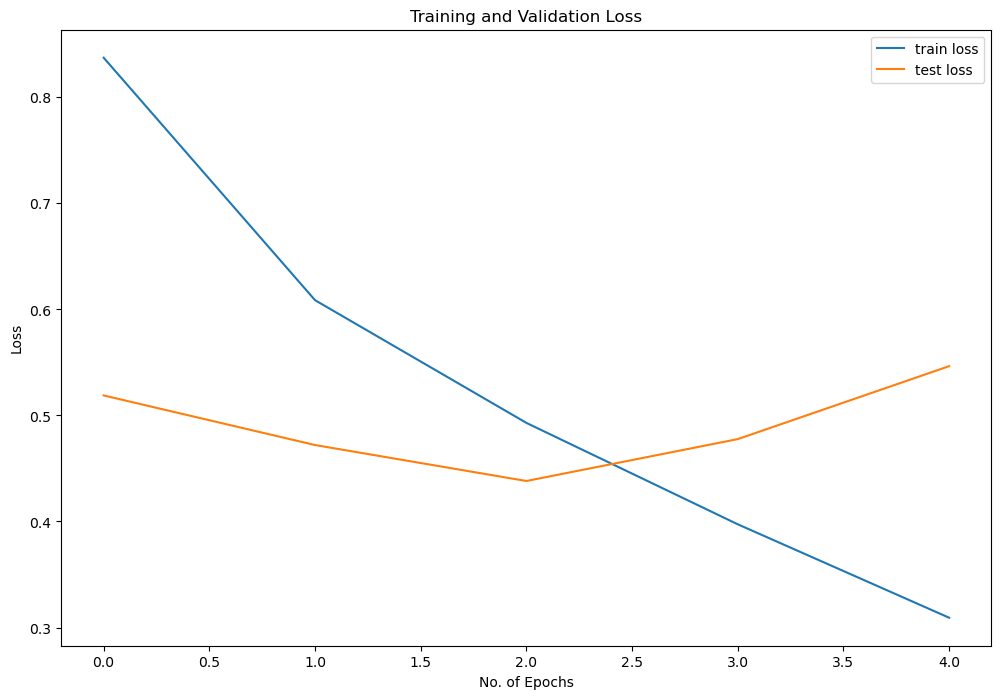

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

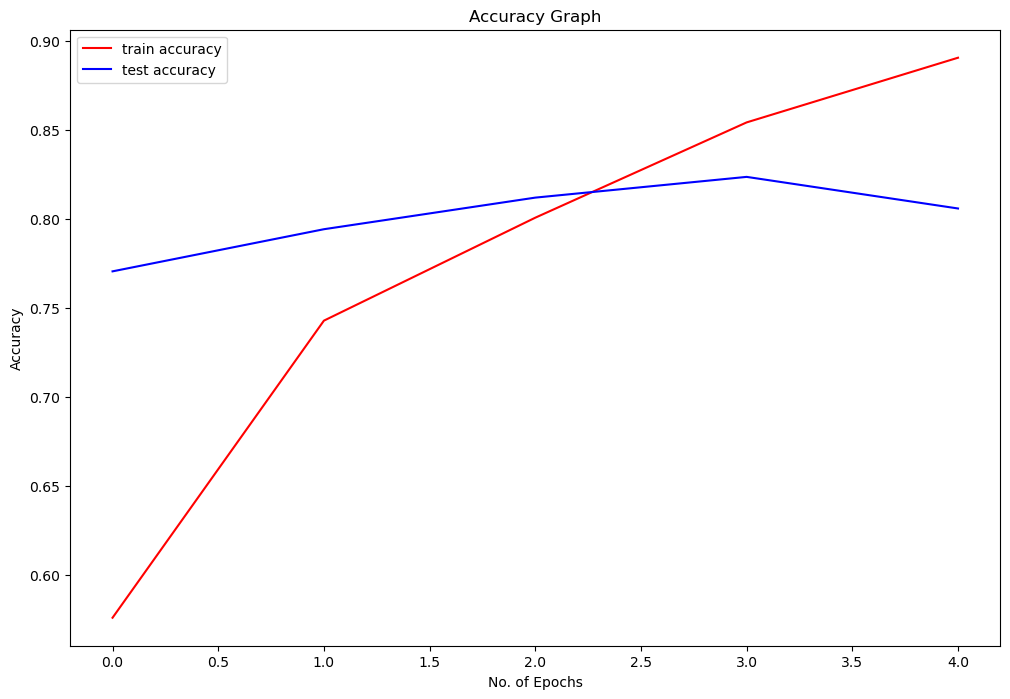

In [32]:
plt.figure(figsize=(12,8))
plt.plot(history.history['categorical_accuracy'],'r',label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'],'b',label='test accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [33]:
model.save('my_model02.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Print shapes of the arrays to debug
print(f"Shape of X_test_tokens['input_ids']: {X_test_tokens['input_ids'].shape}")
print(f"Shape of X_test_tokens['attention_mask']: {X_test_tokens['attention_mask'].shape}")
print(f"Shape of y_test_encoded: {y_test_encoded.shape}")

# Ensure y_test_encoded is one-hot encoded
if y_test_encoded.ndim == 1:
    y_test_encoded = np.eye(3)[y_test_encoded]

# Evaluate the model
loss, acc = model.evaluate(
    {'input_ids': X_test_tokens['input_ids'], 'attention_mask': X_test_tokens['attention_mask']}, 
    y_test_encoded
)
print("Test Categorical Cross-Entropy Loss:", loss)
print("Test Categorical Accuracy:", acc)

# Make predictions on the test data
predictions = model.predict(
    {'input_ids': X_test_tokens['input_ids'], 'attention_mask': X_test_tokens['attention_mask']}
)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class indices
true_labels = np.argmax(y_test_encoded, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Shape of X_test_tokens['input_ids']: (5403, 40)
Shape of X_test_tokens['attention_mask']: (5403, 40)
Shape of y_test_encoded: (5403,)
169/169 [==============================] - 110s 652ms/step - loss: 0.5465 - categorical_accuracy: 0.8058
Test Categorical Cross-Entropy Loss: 0.5464680194854736
Test Categorical Accuracy: 0.8058485984802246
169/169 [==============================] - 119s 668ms/step
Confusion Matrix:
[[1578   13  705]
 [  21  500   75]
 [ 192   43 2276]]


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.69      0.77      2296
     Class 1       0.90      0.84      0.87       596
     Class 2       0.74      0.91      0.82      2511

    accuracy                           0.81      5403
   macro avg       0.84      0.81      0.82      5403
weighted avg       0.82      0.81      0.80      5403



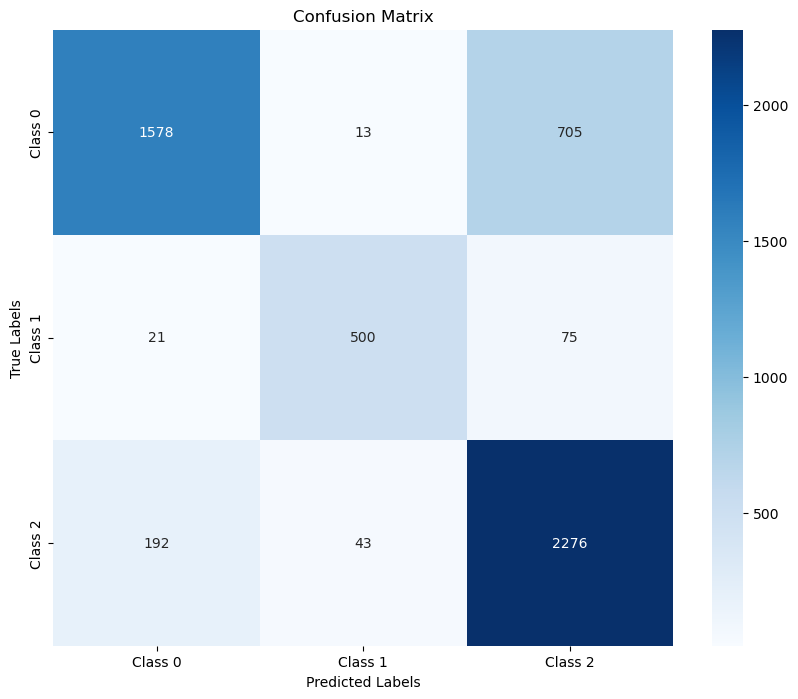

In [36]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2'])
print("Classification Report:")
print(report)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()